# Random Forest

Random forest algorithm intuition can be divided into two stages. In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:
- Randomly select k features from a total of m features where k < m.
- Among the k features, calculate the node d using the best split point.
- Split the node into daughter nodes using the best split.
- Repeat 1 to 3 steps until l number of nodes has been reached.
- Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.

In the second stage, we make predictions using the trained random forest algorithm.
- We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
- Then, we calculate the votes for each predicted target.
- Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.

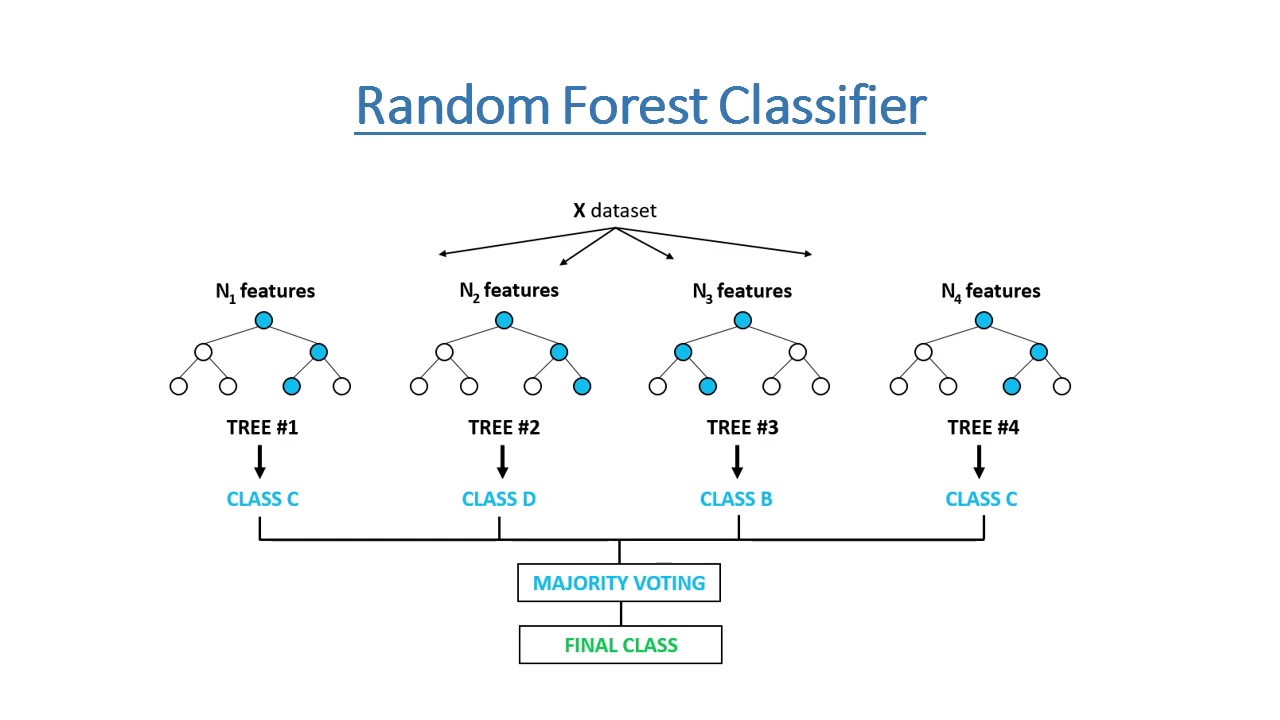

####  Advantages:

1. Random forest algorithm can be used to solve both classification and regression problems.
2. It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3. Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
4. Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5. Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.

####  DisAdvantages:
1. The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2. The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.


In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [31]:
df = pd.read_csv('fetal_health.csv', header = 0)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### fetal health distribution

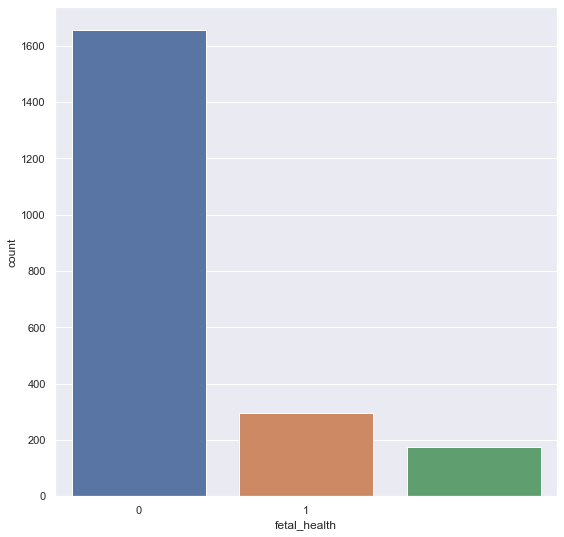

In [32]:
g = sns.countplot(df['fetal_health'])
g.set_xticklabels(['0','1'])
plt.show()

In [20]:
y=df['fetal_health']
X=df.drop(['fetal_health'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028BBF594D30>,
      dtype=object)

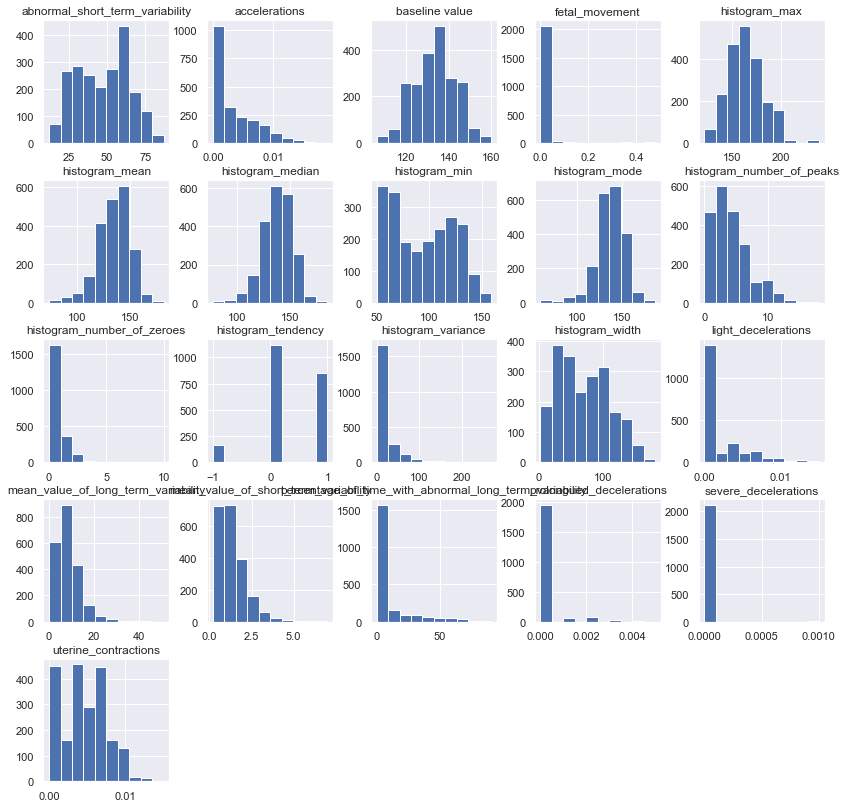

In [21]:
rcParams['figure.figsize'] = 14, 14
X.hist()

### drop the variable with few value

In [22]:
list_drop = ['fetal_movement',
             'severe_decelerations',
            ]
X.drop(list_drop,axis=1,inplace=True)

We can't do the log transformation here since the orignal data include zero value which may include important information for the classification.

In [23]:
X.columns

Index(['baseline value', 'accelerations', 'uterine_contractions',
       'light_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

### data normalization

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler
stdscalar =StandardScaler()
X_train =  stdscalar.fit_transform(X_train)
X_test =  stdscalar.transform(X_test)

### random forest model

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
rc = RandomForestClassifier(max_depth=100, random_state=0,bootstrap=True,n_estimators=500)
rc.fit(X_train, y_train)
#Predict test data set.
y_pred = rc.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       494
         2.0       0.87      0.76      0.81        86
         3.0       0.95      0.93      0.94        58

    accuracy                           0.95       638
   macro avg       0.93      0.89      0.91       638
weighted avg       0.95      0.95      0.95       638



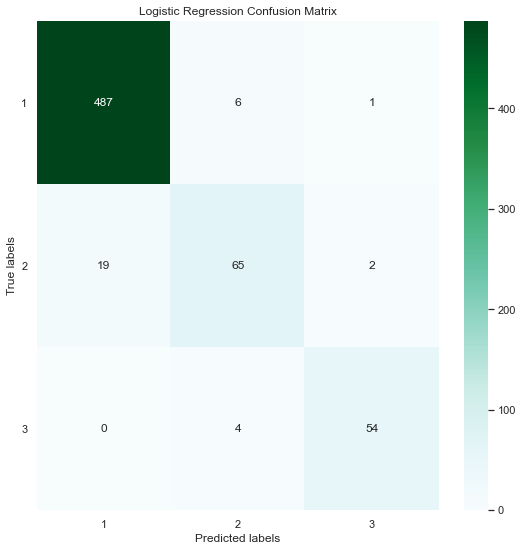

In [30]:
rcParams['figure.figsize'] = 9,9
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
labels = ['1','2','3']
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='BuGn') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

Based on the 3dimensional confusion matrix, our results from random forest are relatively good. Except for the recall rate of calss 2,which is expected since the distribution of labels is not balanced. It's possible to generate a biased model w.r.t certain class. Furthermore, we delete some "useless" variable who has few values. That might be a factor leading to the good model performance as well.

We can't plot ROC and AUC here since we have multiple classes (more than 2 here)

### Hyperparameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [200,400,500,600]
# Maximum number of levels in tree
max_depth = [5,10,50,100]

#Convert to dictionary
hyperparameters = {'n_estimators': n_estimators,
               'max_depth': max_depth}


#Create new RCobject
RC_tune = RandomForestClassifier( random_state=0,bootstrap=True)

#Use GridSearch
RC_2 = GridSearchCV(RC_tune, hyperparameters, cv=5)

#Fit the model
best_model_rc = RC_2.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best n_estimators:', best_model_rc.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model_rc.best_estimator_.get_params()['max_depth'])



Best n_estimators: 200
Best max_depth: 50


In [39]:
rcbest = RandomForestClassifier(max_depth=50, random_state=0,bootstrap=True,n_estimators=200)
rcbest.fit(X_train, y_train)
#Predict test data set.
y_pred = rcbest.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       494
         2.0       0.85      0.73      0.79        86
         3.0       0.95      0.90      0.92        58

    accuracy                           0.94       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.94      0.94      0.94       638



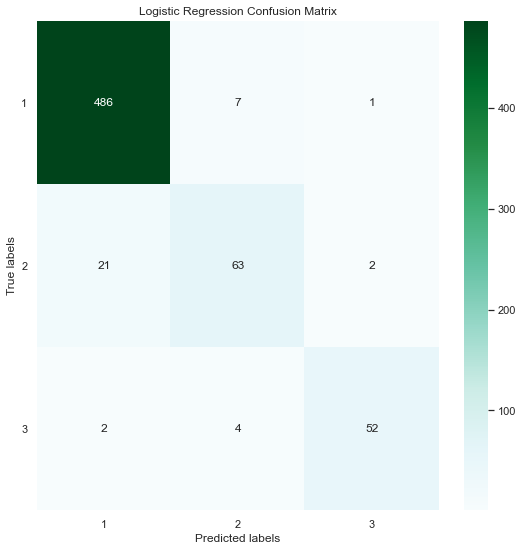

In [40]:
rcParams['figure.figsize'] = 9,9
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
labels = ['1','2','3']
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='BuGn') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

After the hyperparameter tuning, there is no significant improvement in this case. Somehow we need to tune more combinations fof the hyperparameters.